In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [44]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/Iris.csv")

In [45]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
x = df.iloc[:, 1:5]
y = df['Species']

In [47]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [48]:
params = {"criterion":["gini", "entropy"], "max_depth":list(range(1,10) )}

In [49]:
gs = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1, verbose=1)

In [50]:
best_model = gs.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.6s finished


In [51]:
best_model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
model = best_model.best_estimator_.fit(x_train,y_train)
pred = model.predict(x_test)

In [53]:
accuracy_score(y_test, pred)

0.8666666666666667

In [54]:
import graphviz

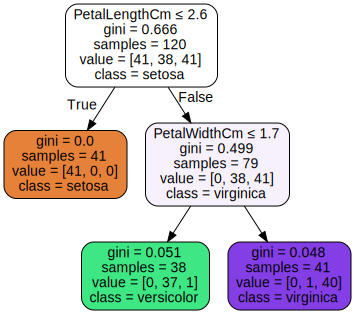

In [55]:
dot_data = export_graphviz(model, out_file=None, feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], class_names=['setosa', 'versicolor', 'virginica'], filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") # This is for exporting to iris.pdf format
graph